In [1]:
%cd /home/heydar/me/BSC/FinalPorject/lsh

/home/heydar/me/BSC/FinalPorject/lsh


In [2]:
import numpy as np
from time import time

# Loading Dataset
## Preparing Dataset from sickit-learn
In this example our dataset is a news group dataset.

In [3]:
import pandas as pd
data=pd.read_csv('/media/heydar/extra2/BSC/LSH_DATASET/SnappFOod/Snappfood - Sentiment Analysis.csv' , on_bad_lines='skip' , delimiter='\t')

In [4]:
data

,Unnamed: 0,comment,label,label_id
0,NaN,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1.0
1,NaN,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0.0
2,NaN,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1.0
3,NaN,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0.0
4,NaN,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0.0
...,...,...,...,...
69995,NaN,سلام من به فاکتور غذاهایی که سفارش میدم احتیاج...,SAD,1.0
69996,NaN,سایز پیتزا نسبت به سفارشاتی که قبلا گذشتم کم ش...,SAD,1.0
69997,NaN,من قارچ اضافه رو اضافه کرده بودم بودم اما اگر ...,HAPPY,0.0
69998,NaN,همرو بعد ۲ساعت تاخیر اشتباه آوردن پولشم رفت رو...,SAD,1.0


In [5]:
from hazm import *
import re
normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()

data['comment']= data['comment'].apply(lambda x: re.sub(r'[\da-zA-Z\!\(\)\-\[\]\{\}\;\:\'\"\\\,\<\>\.\/\?\@\#\$\%\^\&\*\_\~\؟\،\٪\×\÷\»\«]', '', x))

data = data[['comment']]
data.dropna(inplace=True)

data['comment'] = data['comment'].apply(lambda x: normalizer.normalize(x)) 

data['comment'] = data['comment'].apply(lambda x: [stemmer.stem(word) for word in x.split()])

data['comment'] = data['comment'].apply(lambda words: ' '.join([lemmatizer.lemmatize(word).split('#')[0] for word in words])) 

/home/heydar/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_44728/77962516.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['comment'] = data['comment'].apply(lambda x: normalizer.normalize(x))
/tmp/ipykernel_44728/77962516.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [6]:
data.to_csv('/media/heydar/extra2/BSC/LSH_DATASET/SnappFOod/Normal_SnappFood.csv' )

In [7]:
data=pd.read_csv('/media/heydar/extra2/BSC/LSH_DATASET/SnappFOod/Normal_SnappFood.csv')

In [8]:
data

,Unnamed: 0,comment
0,0,واقعا حیف وق که نوشت سرویس دهیتون شده افتضاح
1,1,قرار بود ساعته برسه ول ن ساع زود از موقع رسید ...
2,2,قیم این مدل اصلا با کیفیت سازگار نداره فقط ظاه...
3,3,عاللل بود همه چه درس و به اندازه و کیف خوب امی...
4,4,شیرین وانیل فقط یک مدل بود
...,...,...
69995,69995,سلا من به فاکتور غذا که سفار مید احتیاج دار و ...
69996,69996,سایز پیتزا نسب به سفارشات که قبلا گذ ک شده بود
69997,69997,من قارچ اضافه رو اضافه کرده بود بود اما اگر هم...
69998,69998,همرو بعد ساع تاخیر اشتباه آوردن پول رف رو هوا


In [9]:
data=data.dropna()

### Do TF-IDF on dataset

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    ngram_range=(2,2)
)

In [11]:
t0 = time()
X_tfidf = vectorizer.fit_transform(data.comment)

print(f"vectorization done in {time() - t0:.3f} s")

vectorization done in 2.201 s


after adding limit to data some of rows are empty so we need to drop them for better result.

In [12]:
drops_datas=np.where([X_tfidf.getnnz(1)<1])[1]
nnzero_rows=X_tfidf.getnnz(1)>1
X_tfidf=X_tfidf[nnzero_rows]

In [13]:
print(f"{X_tfidf.nnz / np.prod(X_tfidf.shape):.3f}")
# shingles = [set(vector[0].nonzero()[1]) for vector in X_tfidf]

0.000


In [14]:
# Create a copy of the CSR matrix and convert it to a COO matrix
coo_matrix = X_tfidf.tocoo(copy=True)

# Replace non-zero values with their own column indices
coo_matrix.data = coo_matrix.col

# Convert the COO matrix back to CSR format
shingles = coo_matrix.tocsr()


In [15]:
#set Cluster Number
true_k = 2000


In [16]:
X_tfidf.shape

(67464, 28488)

In [17]:

from src.LSH.MinHash import MinHash
from src.LSH.lsh import LSH
#Make LSH
prime=36791
lsh_time_start=time()
b, r = 30, 4
num_perm = b * r
minhash = MinHash(num_perm)
mh = minhash.sign_csr_callback_permutation(shingles, shingles.shape[1],prime)
mh = np.array(mh)
print('waiting for Create LSH index')
# Create LSH index
lsh = LSH(b=b, r=r)
lsh.fit(mh)
print('LSH index Created')
lsh_time=time()-lsh_time_start

waiting for Create LSH index
LSH index Created


In [18]:
#Make LSH Graph
import networkx as nx
from src.utils.storage import HashNodeSet
graph_time_start=time()
G = nx.Graph()
_hash_nodes_start = lsh.keys.size() + 10
hash_to_node_map = [HashNodeSet() for _ in range(lsh.b)]
for node in lsh.keys.keys():
    for bi, hash_bi in enumerate(lsh.keys.get(node)):
        hash_node = hash_to_node_map[bi].add(hash_bi)
        G.add_edges_from([(f'p_{node}', f'h_{hash_node}_{bi}')])
graph_time=time()-graph_time_start

In [19]:
from src.Kmeans.kmeans import get_random_state
import heapq
import random
random_state=get_random_state()
def generate_cluster_with_graph(k, X, G, type):
    subgraphs = list(nx.connected_components(G))
    print(len(subgraphs))
    centroids = [{} for _ in range(k)]
    if k < len(subgraphs):
        k_max_indices = heapq.nsmallest(k, range(len(subgraphs)), key=lambda i: len(subgraphs[i]))
        for ik, kvalue in enumerate(k_max_indices):
            centroids[ik] = int(random.choice([i[2:] for i in subgraphs[kvalue] if i.startswith('p')]))
        centroids = np.array(centroids)
        return X[centroids].toarray()
    return centroids
initializing_time=time()
centroids = generate_cluster_with_graph(true_k, X_tfidf, G, 'min')
initializing_time=time()-initializing_time
initializing_time+=graph_time+lsh_time

35696


In [20]:
from collections import defaultdict
from sklearn import metrics



def fit_and_evaluate(km, X,lsh=None, name=None, n_runs=5,seek_time=0):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.random_state=seed
        t0 = time()
        if lsh:
            km.fit(X,lsh)
        else:
            km.fit(X)
        train_times.append(time()+seek_time - t0)
        scores['inertia'].append(km.inertia_)
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)


In [21]:
evaluations = []
evaluations_std = []


In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=1,
    init='random'
)
fit_and_evaluate(kmeans, X_tfidf, name="KMeans random \non  tf-idf vectors", n_runs=1)

print("__________________________")
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=1,

)
fit_and_evaluate(kmeans, X_tfidf, name="KMeans++\non tf-idf vectors", n_runs=1)
print("__________________________")



clustering done in 438.42 ± 0.00 s 
inertia: 54867.135 ± 0.000
Silhouette Coefficient: 0.001 ± 0.000
__________________________
clustering done in 487.74 ± 0.00 s 
inertia: 54137.926 ± 0.000
Silhouette Coefficient: 0.002 ± 0.000
__________________________


In [42]:
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=1,
    init=centroids

)
fit_and_evaluate(kmeans, X_tfidf, name="KMeans\non LSH1-1",n_runs=1)

clustering done in 462.86 ± 0.00 s 
inertia: 54667.135 ± 0.000
Silhouette Coefficient: 0.003 ± 0.000


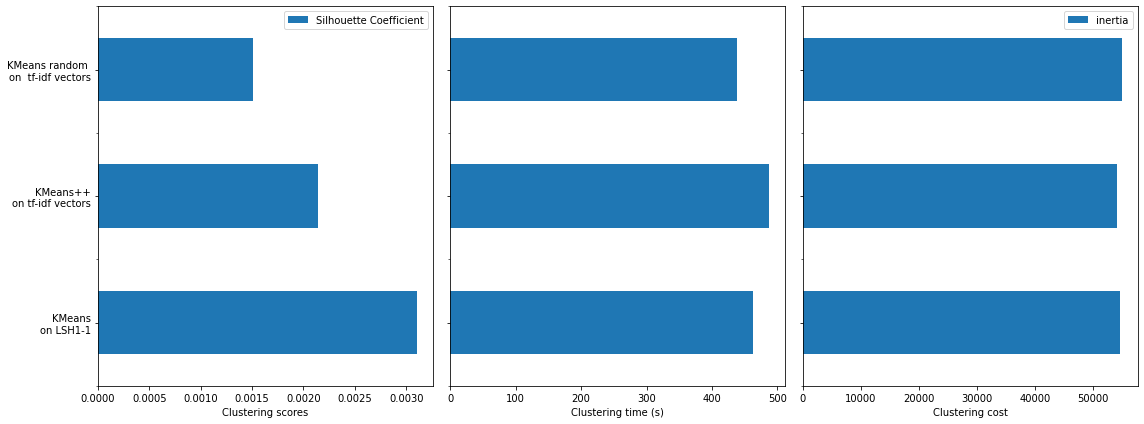

In [47]:


# Plot
import matplotlib.pyplot as plt
import pandas as pd

fig, (ax0, ax1,ax2) = plt.subplots(ncols=3, figsize=(16, 6), sharey=True)

df = pd.DataFrame(evaluations[::-1]).set_index("estimator")
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")

df.drop(
    ["train_time",'inertia'],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")

df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")


df[['inertia']].plot.barh(ax=ax2,xerr=df_std)
ax2.set_xlabel("Clustering cost")
ax2.set_ylabel("")


plt.tight_layout()
plt.savefig("snappFood_30_4Algo1.png")
plt.savefig('snappFood_30_4Algo1.pdf')

plt.show()

